In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Import basic libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gzip

In [7]:
with open('../00_Resources/all_merged_datasets.csv', 'rb') as fd:
    gzip_fd = gzip.GzipFile(fileobj=fd)
    df = pd.read_csv(gzip_fd)
df = df.sample(frac=1).reset_index(drop=True)
df

,Unnamed: 0,title,text,label
0,38612,Republicans appear all but certain to pass tax...,WASHINGTON (Reuters) - The Republican-controll...,True
1,10499,Turkey's Erdogan says will take Jerusalem reso...,ISTANBUL (Reuters) - Turkey will take the reso...,True
2,54369,WATCH: Chuck Schumer CRUSHES Trump’s Tweeting...,Trump s team is working very hard to accommoda...,False
3,58377,BRILLIANT! Why “Democratic” Socialism Doesn’t ...,This is Stephen Crowder at his best So smart a...,False
4,34641,Algeria picks up 286 boat migrants en route to...,ALGIERS (Reuters) - Algeria s coastguard has p...,True
...,...,...,...,...
60287,33275,U.S. Senate panel to vote Tuesday on Powell no...,WASHINGTON (Reuters) - The Senate Banking Comm...,True
60288,5499,"U.S. lawmaker probed on sex reports, second co...",WASHINGTON (Reuters) - The U.S. House of Repre...,True
60289,28620,Is GOP ready to unite against Trump for his Mu...,Less than 24 hours after President Barack Obam...,True
60290,57339,Alabama win thrills Democrats as Republicans p...,WASHINGTON (Reuters) - Democrats said on Wedne...,True


In [10]:
# ML libraries
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [11]:
# TODO: find out how to CountVectorize a multi-dimensional array.
X = df['title']
y = df['label']

In [12]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X.shape, y.shape)

(60292,) (60292,)


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

tfidf_train

<40395x22998 sparse matrix of type '<class 'numpy.float64'>'
	with 346961 stored elements in Compressed Sparse Row format>

In [14]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_df

,00,000,000m,000s,000th,0045,00pm,01,0112,0130,...,القذافي,الكذب,بقلم,تييري,رسائل,سر,كلينتون,ميسان,هيلاري,والإخوان
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Create a support vector machine linear classifer and fit it to the training data
model = SVC(C=1.0, kernel='linear', gamma=0.0001, probability=True)
model.fit(tfidf_train, y_train)

# Print the model score using the test data
print(model.score(tfidf_train, y_train))
print(model.score(tfidf_test, y_test))
pred = model.predict(tfidf_test)
acc_score = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
print("accuracy:   %0.3f" % acc_score)
print("f1 score:   %0.3f" % f1)

KeyboardInterrupt: 

In [114]:
# Calculate the classification report
from sklearn.metrics import classification_report
pred = model.predict(tfidf_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       False       0.87      0.88      0.87     10229
        True       0.87      0.86      0.86      9668

    accuracy                           0.87     19897
   macro avg       0.87      0.87      0.87     19897
weighted avg       0.87      0.87      0.87     19897



In [115]:
model = SVC(C=50, kernel='rbf', gamma=0.005)
model.fit(tfidf_train, y_train)

# Print the model score using the test data
print(model.score(tfidf_train, y_train))
print(model.score(tfidf_test, y_test))
pred = model.predict(tfidf_test)
acc_score = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
print("accuracy:   %0.3f" % acc_score)
print("f1 score:   %0.3f" % f1)

0.917143210793415
0.8676182339046087
accuracy:   0.868
f1 score:   0.863


In [116]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score

linear_clf = PassiveAggressiveClassifier()

linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
acc_score = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
print(linear_clf.score(tfidf_train, y_train))
print(linear_clf.score(tfidf_test, y_test))
print("accuracy:   %0.3f" % acc_score)
print("f1 score:   %0.3f" % f1)

0.9852704542641416
0.8340955923003468
accuracy:   0.834
f1 score:   0.830


In [117]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=0.1)

last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

Alpha: 0.00 Score: 0.82294
Alpha: 0.10 Score: 0.84415
Alpha: 0.20 Score: 0.84666
Alpha: 0.30 Score: 0.84756
Alpha: 0.40 Score: 0.84787
Alpha: 0.50 Score: 0.84787
Alpha: 0.60 Score: 0.84807
Alpha: 0.70 Score: 0.84872
Alpha: 0.80 Score: 0.84882
Alpha: 0.90 Score: 0.84882


In [126]:
clf = MultinomialNB(alpha=0.8)
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
acc_score = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
print(clf.score(tfidf_train, y_train))
print(clf.score(tfidf_test, y_test))
print("accuracy:   %0.3f" % acc_score)
print("f1 score:   %0.3f" % f1)

0.8909270949374922
0.8488214303663869
accuracy:   0.849
f1 score:   0.839


1
3
5
7
9
11
13
15
17
19


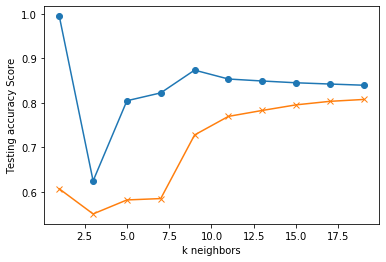

In [119]:
# Fit KNN model with tfidf and chart results
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(tfidf_train, y_train)
    train_score = model.score(tfidf_train, y_train)
    test_score = model.score(tfidf_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(k)
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [122]:
model = KNeighborsClassifier(n_neighbors=15)
model.fit(tfidf_train, y_train)
pred = model.predict(tfidf_test)
acc_score = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
print(model.score(tfidf_train, y_train))
print(model.score(tfidf_test, y_test))
print("accuracy:   %0.3f" % acc_score)
print("f1 score:   %0.3f" % f1)

0.845129347691546
0.795597326230085
accuracy:   0.796
f1 score:   0.806


In [49]:
# save model using joblib
import joblib
filename = '../05_Models/fake_title_SVM_model.sav'
joblib.dump(model, filename)

['../05_Models/fake_title_SVM_model.sav']

In [13]:
X = test_df['title']
y = test_df['label']

# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Get training feature names
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

# Create a support vector machine linear classifer and fit it to the training data
# model = SVC(C=1.0, kernel='linear', gamma=0.0001)
model.fit(tfidf_train, y_train)

# Print the model score using the test data
print(model.score(tfidf_train, y_train))
print(model.score(tfidf_test, y_test))

# Calculate the classification report
preds = model.predict(tfidf_test)
print(classification_report(y_test, preds))

0.9634778510838832
0.8010521281683405
              precision    recall  f1-score   support

       False       0.81      0.80      0.81      1071
        True       0.79      0.80      0.80      1020

    accuracy                           0.80      2091
   macro avg       0.80      0.80      0.80      2091
weighted avg       0.80      0.80      0.80      2091



In [51]:
preds = model.predict(tfidf_test)


,00,000,0000,00004,000063,00042,0009,000938,000american,000have,...,zzjjpdaivn,zzn3bqnfsk,zzpx_bzka40police,zzqvyk8xif,zzsg90pbf6,zztaine,zzuml4hkoc,zzzzaaaacccchhh,zzzzzzzz,émigré
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.030085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30076,0.000000,0.116148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30077,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30078,0.185293,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30079,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# save model using joblib
import joblib
filename = '../05_Models/fake_body_SVM_model.sav'
joblib.dump(model, filename)

In [16]:
X = df['title']
y = df['label']

# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score
# A pipeline for the text model
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
model = SVC(C=1.0, kernel='linear', gamma=0.0001, probability=True)
pipeline = make_pipeline(vectorizer, model)

# Fit vectorizer and model
pipeline.fit(X_train, y_train)

# Print model score
pred = pipeline.predict(X_test)
acc_score = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
print("accuracy:   %0.3f" % acc_score)
print("f1 score:   %0.3f" % f1)

accuracy:   0.870
f1 score:   0.865


In [17]:
# save model using joblib
import joblib
filename = '../05_Models/combined_title_SVM_linear_pipeline.sav'
joblib.dump(pipeline, filename)

['../05_Models/combined_title_SVM_linear_pipeline.sav']